In [4]:
import seaborn as sns
sns.set_palette('husl')

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import hopsworks
import pandas as pd

## Get data

In [6]:
# Log in to hopworks
project = hopsworks.login()
fs = project.get_feature_store()

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.



Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/213141
Connected. Call `.close()` to terminate connection gracefully.


In [7]:
# Import data
from ucimlrepo import fetch_ucirepo

wine_data = fetch_ucirepo(id=186)
X = wine_data.data.features
y = wine_data.data.targets
wine_df = pd.concat([X, y], axis=1)
wine_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [8]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [9]:
wine_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Exploratory Data Analysis (EDA)


<Axes: >

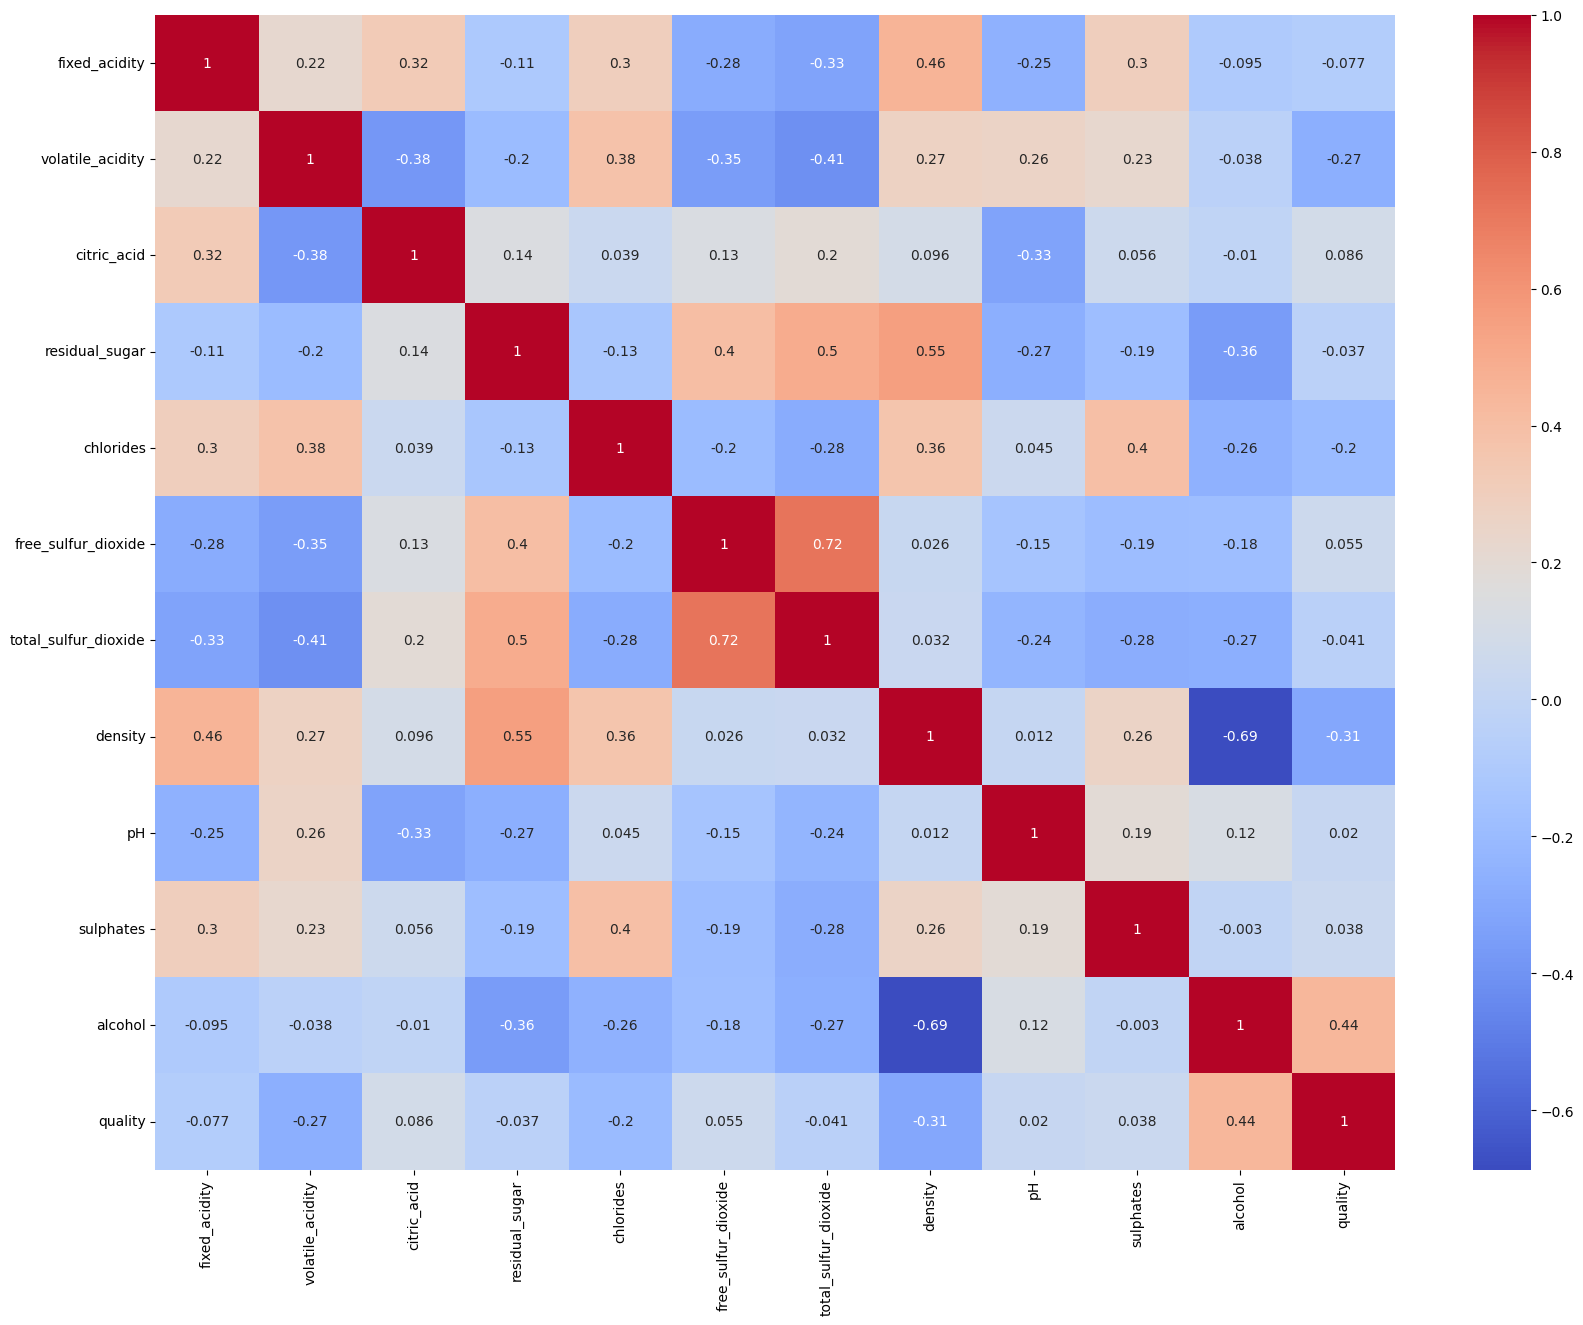

In [10]:
# Check the correaltion between features and decide which features to drop
# (drop one in the pair which has high correlation)
corr = wine_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(data = corr, annot=True, cmap='coolwarm')

In [11]:
# Find pairs of correaltion >= corr_thres
corr_thres = 0.6
corr[(abs(corr)>=corr_thres) & (corr!=1)].stack()

free_sulfur_dioxide   total_sulfur_dioxide    0.720934
total_sulfur_dioxide  free_sulfur_dioxide     0.720934
density               alcohol                -0.686745
alcohol               density                -0.686745
dtype: float64

In [12]:
# Get feature ranges of different wine qualities (for generating samples)
import os

csv_path = 'feature_ranges.csv'
if not os.path.exists(csv_path):
    feature_names = [name for name in X.columns]
    feature_ranges = wine_df.groupby('quality').agg(['min', 'max'])
    feature_ranges.to_csv('feature_ranges.csv', index=False)
    print("Created csv file")


### Get the range of features

In [38]:
feature_names = [name.lower() for name in X.columns]   # Set to lower case since the feature group has done this

In [6]:
feature_mins = dict(wine_df.describe().loc['min'])
feature_mins['ph'] = feature_mins.pop('pH')
feature_maxs = dict(wine_df.describe().loc['max'])
feature_maxs['ph'] = feature_maxs.pop('pH')

## Backfilling

In [45]:
wine_fg = fs.get_or_create_feature_group(
    name='wine',
    version=1,
    primary_key=feature_names,
    description="Wine quality dataset",
    
)
wine_fg.insert(wine_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/213141/fs/213060/fg/228691


Uploading Dataframe: 100.00% |██████████| Rows 6497/6497 | Elapsed Time: 00:16 | Remaining Time: 00:00


Launching job: wine_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/213141/jobs/named/wine_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x1dca9e46f40>, None)

## Data validation

In [47]:
from great_expectations.core import ExpectationSuite, ExpectationConfiguration

def expect(suite, column, min_val, max_val):
    suite.add_expectation(
        ExpectationConfiguration(
            expectation_type="expect_column_values_to_be_between",
            kwargs={
                "column":column,
                "min_value":min_val,
                "max_value":max_val
            }
        )
    )

In [72]:
suite = ExpectationSuite(expectation_suite_name="wine_features")

for feature_name in feature_names:
    expect(suite, feature_name, feature_mins[feature_name], feature_maxs[feature_name])
wine_fg.save_expectation_suite(expectation_suite=suite, validation_ingestion_policy="STRICT")

Attached expectation suite to Feature Group, edit it at https://c.app.hopsworks.ai:443/p/213141/fs/213060/fg/228691
